In [1]:
!pip install selenium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [3]:
macbook_air=[]

In [4]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac   

In [5]:
macbook_air

["\n\n  Best in class. Performance, Display, Battery backup are above excellent.A must have for every tech geekBought this after selling my Yamaha R15, but no regrets.... It's speed is better than R15. 😅\n\n",
 "\n\n  Pros:-1. It's Superfast. It will feel fast on everything - from bootup, to app opening, to builds etc.2. It's slim. Air has no fan hence it's form factor is even slimmer than Pro.3. It remains cold even during heavy code builds. It's hard to find things which makes it warm actually.4. I have tried several graphics heavy games and they run great without any heat as well5. If you are just browsing with Wifi on, typically it loses 10% battery in 7-8 hours. But it's for Safari browser. It has achieved I guess what people will call power-efficiency nirvana.6. Screen, Sound and Mic quality are awesomeCons:-1. Since it's winters in India now, some people might not like that it doesn't heat up the surroundings2. For longer workloads - like if you are doing daily large video compr

In [6]:
len(macbook_air)

224

In [7]:
rev={"review":macbook_air}

In [8]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [9]:
review_data

,review
0,"\n\n Best in class. Performance, Display, Battery backup are above excellent.A must have for every tech geekBought this after selling my Yamaha R15, but no regrets.... It's speed is better than R15. 😅\n\n"
1,"\n\n Pros:-1. It's Superfast. It will feel fast on everything - from bootup, to app opening, to builds etc.2. It's slim. Air has no fan hence it's form factor is even slimmer than Pro.3. It remains cold even during heavy code builds. It's hard to find things which makes it warm actually.4. I have tried several graphics heavy games and they run great without any heat as well5. If you are just browsing with Wifi on, typically it loses 10% battery in 7-8 hours. But it's for Safari browser. It has achieved I guess what people will call power-efficiency nirvana.6. Screen, Sound and Mic quality are awesomeCons:-1. Since it's winters in India now, some people might not like that it doesn't heat up the surroundings2. For longer workloads - like if you are doing daily large video compressions/..."
2,"\n\n If we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.\n\n"
3,"\n\n Ordered the M1 Air on 5th August and got it delivered on the 7th. Then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with M1 Macs. So I called up Apple and they offered me two options, either a new replacement Mac or full refund since mine is still under 14 days. As soon as I revealed that I purchased from Amazon, the Apple sales team said sorry they can't help me since Amazon is not Apple authorised seller.I'm never buying another Apple product from Amazon again. If you want the full Apple experience like seamless replacement, refund or after sales then you need to buy it from Apple or from any of its authorised sellers. I made a costly mistake hope others will not after reading this message.\n\n"
4,"\n\n Should i buy the 16gb ram from apple store? This was the question i had for a long time. After going through tons of videos that compares 8gb air vs 16gb there was a clear evidence that with my use i can still be happy with the m1 8gb ram variant.This is not a long term review but i shall update the review after few months of usage.Why i opted for 8gb ram?My use is browsing some secure pages, maybe watch some videos too. Use imovies to edit small videos (not heavy 4k long videos as such) but i have seen that this can support even editing 4k videos. But then definitely if you are someone who use it majorly for editing 4k videos then you should probably get the 16gb variant. Then i do a little bit of coding too.I do have a office laptop that is a 16gb ram intel one. I did try openi..."
...,...
219,"\n\n I am having macbook air m1 2020 with 512gb harddrive. Its starting up with keys like spacebar,command,p,k,4,5... etc. Other than power button too. If anyone facing same issue lemme knw @cyrilrathore91gmail.com\n\n"
220,"\n\n\n\n\n The media could not be loaded.\n \n\n\n\n\n Using it from past 45 days daily for 9-10 hours ( even more ).Cons-1. Some apps are not optimized and crashes a lot ( like chromium which I have to use daily ), so if you have to use some app because of your work please check first in forums or fb groups with other users.2. You need to buy a cleaning kit ( microfibre cloth and screen cleaner ) otherwise you will see a lot of marks, spot on it.3. Charger- Apple just hate chargers and charging speed charger included is 30W only and it gets really really hot while charging. Charging is very slow.4. No upgrade option - you can't upgrade ram or storage after buying5. Keyboard- feels fragile may be because of slim profile of laptop and only one type of..."
221,\n\n A bit expensive when we compare with today's intel or AMD based windows laptops with rtx 30 graphics . But this apple M1 terms of overall performance . It is far beyond what windows laptops can offer in same segment . 💻💻💻Please give a like to my comment .

In [10]:
text=" ".join(review_data)

In [11]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [12]:
review_data

,review
0,"best in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it's speed is better than r15. 😅"
1,"pros:-1. it's superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it's slim. air has no fan hence it's form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it's hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it's for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it's winters in india now, some people might not like that it doesn't heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/conv..."
2,"if we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited."
3,"ordered the m1 air on 5th august and got it delivered on the 7th. then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with m1 macs. so i called up apple and they offered me two options, either a new replacement mac or full refund since mine is still under 14 days. as soon as i revealed that i purchased from amazon, the apple sales team said sorry they can't help me since amazon is not apple authorised seller.i'm never buying another apple product from amazon again. if you want the full apple experience like seamless replacement, refund or after sales then you need to buy it from apple or from any of its authorised sellers. i made a costly mistake hope others will not after reading this message."
4,"should i buy the 16gb ram from apple store? this was the question i had for a long time. after going through tons of videos that compares 8gb air vs 16gb there was a clear evidence that with my use i can still be happy with the m1 8gb ram variant.this is not a long term review but i shall update the review after few months of usage.why i opted for 8gb ram?my use is browsing some secure pages, maybe watch some videos too. use imovies to edit small videos (not heavy 4k long videos as such) but i have seen that this can support even editing 4k videos. but then definitely if you are someone who use it majorly for editing 4k videos then you should probably get the 16gb variant. then i do a little bit of coding too.i do have a office laptop that is a 16gb ram intel one. i did try opening s..."
...,...
219,"i am having macbook air m1 2020 with 512gb harddrive. its starting up with keys like spacebar,command,p,k,4,5... etc. other than power button too. if anyone facing same issue lemme knw .com"
220,"\n the media could not be loaded.\n \n using it from past 45 days daily for 9-10 hours ( even more ).cons-1. some apps are not optimized and crashes a lot ( like chromium which i have to use daily ), so if you have to use some app because of your work please check first in forums or fb groups with other users.2. you need to buy a cleaning kit ( microfibre cloth and screen cleaner ) otherwise you will see a lot of marks, spot on it.3. charger- apple just hate chargers and charging speed charger included is 30w only and it gets really really hot while charging. charging is very slow.4. no upgrade option - you can't upgrade ram or storage after buying5. keyboard- feels fragile may be because of slim profile of laptop and only one type of light is there,..."
221,a bit expensive when we compare with today's intel or amd based windows laptops with rtx 30 graphics . but this apple m1 terms of overall performance . it is far beyond what windows laptops can offer in same segment . 💻💻💻please give a like to my comment . thank you amazon . 💖💝⭐️🌟🎉🎉💐💐
222,"the best laptop for all your

In [13]:
text=" ".join(review_data["review"])

In [14]:
text

'  best in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it\'s speed is better than r15. 😅   pros:-1. it\'s superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it\'s slim. air has no fan hence it\'s form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it\'s hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it\'s for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it\'s winters in india now, some people might not like that it doesn\'t heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/c

In [15]:
text_tokens = word_tokenize(text)

In [16]:
text_tokens

['best',
 'in',
 'class',
 '.',
 'performance',
 ',',
 'display',
 ',',
 'battery',
 'backup',
 'are',
 'above',
 'excellent.a',
 'must',
 'have',
 'for',
 'every',
 'tech',
 'geekbought',
 'this',
 'after',
 'selling',
 'my',
 'yamaha',
 'r15',
 ',',
 'but',
 'no',
 'regrets',
 '....',
 'it',
 "'s",
 'speed',
 'is',
 'better',
 'than',
 'r15',
 '.',
 '😅',
 'pros',
 ':',
 '-1.',
 'it',
 "'s",
 'superfast',
 '.',
 'it',
 'will',
 'feel',
 'fast',
 'on',
 'everything',
 '-',
 'from',
 'bootup',
 ',',
 'to',
 'app',
 'opening',
 ',',
 'to',
 'builds',
 'etc.2',
 '.',
 'it',
 "'s",
 'slim',
 '.',
 'air',
 'has',
 'no',
 'fan',
 'hence',
 'it',
 "'s",
 'form',
 'factor',
 'is',
 'even',
 'slimmer',
 'than',
 'pro.3',
 '.',
 'it',
 'remains',
 'cold',
 'even',
 'during',
 'heavy',
 'code',
 'builds',
 '.',
 'it',
 "'s",
 'hard',
 'to',
 'find',
 'things',
 'which',
 'makes',
 'it',
 'warm',
 'actually.4',
 '.',
 'i',
 'have',
 'tried',
 'several',
 'graphics',
 'heavy',
 'games',
 'and',
 't

In [17]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [18]:
tf=TfidfVectorizer()

In [19]:
text_tf=tf.fit_transform(text_without_sw)

In [20]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [21]:
df

,000,10,100,10000,1080p,11,11gb,12,12hrs,13,...,year,years,yes,yet,you,youtube,yu,zero,zips,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
words_list=" ".join(df)

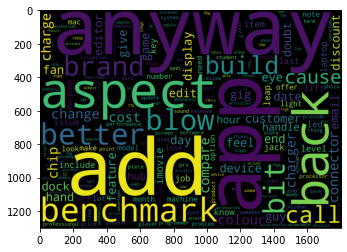

In [23]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [24]:
with open ("positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [25]:
with open ("negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]   

In [26]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [27]:
pos_text=" ".join([word for word in df if not word  in positive_words])

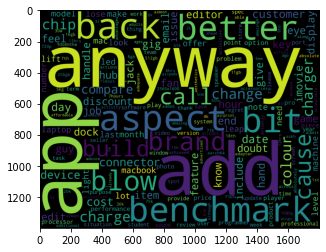

In [28]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

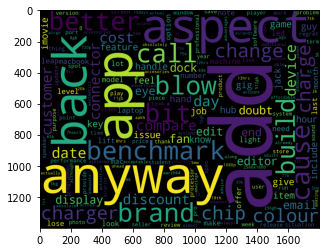

In [29]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [30]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,"best in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it's speed is better than r15. 😅",0.275000,0.387500
1,"pros:-1. it's superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it's slim. air has no fan hence it's form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it's hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it's for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it's winters in india now, some people might not like that it doesn't heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/conv...",0.423249,0.064566
2,"if we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.",0.804167,0.427083
3,"ordered the m1 air on 5th august and got it delivered on the 7th. then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with m1 macs. so i called up apple and they offered me two options, either a new replacement mac or full refund since mine is still under 14 days. as soon as i revealed that i purchased from amazon, the apple sales team said sorry they can't help me since amazon is not apple authorised seller.i'm never buying another apple product from amazon again. if you want the full apple experience like seamless replacement, refund or after sales then you need to buy it from apple or from any of its authorised sellers. i made a costly mistake hope others will not after reading this message.",0.506818,0.033712
4,"should i buy the 16gb ram from apple store? this was the question i had for a long time. after going through tons of videos that compares 8gb air vs 16gb there was a clear evidence that with my use i can still be happy with the m1 8gb ram variant.this is not a long term review but i shall update the review after few months of usage.why i opted for 8gb ram?my use is browsing some secure pages, maybe watch some videos too. use imovies to edit small videos (not heavy 4k long videos as such) but i have seen that this can support even editing 4k videos. but then definitely if you are someone who use it majorly for editing 4k videos then you should probably get the 16gb variant. then i do a little bit of coding too.i do have a office laptop that is a 16gb ram intel one. i did try opening s...",0.478177,0.165286
...,...,...,...
219,"i am having macbook air m1 2020 with 512gb harddrive. its starting up with keys like spacebar,command,p,k,4,5... etc. other than power button too. if anyone facing same issue lemme knw .com",0.200000,-0.041667
220,"\n the media could not be loaded.\n \n using it from past 45 days daily for 9-10 hours ( even more ).cons-1. some apps are not optimized and crashes a lot ( like chromium which i have to use daily ), so if you have to use some app because of your work please check first in forums or fb groups with other users.2. you need to buy a cleaning kit ( microfibre cloth and screen cleaner ) otherwise you will see a lot of marks, spot on it.3. charger- apple just hate chargers and charging speed charger included is 30w only and it gets really really hot while charging. charging is very slow.4. no upgrade option - you can't upgrade ram or storage after buying5. keyboard- feels fragile may be because of slim profile of laptop and only one type of light is there,...",0.641049,0.227222
221,a bit expensive when we compare with today's intel or amd based windows laptops with rtx 30 graphics . but this apple m1 terms of overall performance . it is far

In [31]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data


,review,subjectivity,polarity,analysis
0,"best in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it's speed is better than r15. 😅",0.275000,0.387500,Positive
1,"pros:-1. it's superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it's slim. air has no fan hence it's form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it's hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it's for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it's winters in india now, some people might not like that it doesn't heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/conv...",0.423249,0.064566,Positive
2,"if we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.",0.804167,0.427083,Positive
3,"ordered the m1 air on 5th august and got it delivered on the 7th. then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with m1 macs. so i called up apple and they offered me two options, either a new replacement mac or full refund since mine is still under 14 days. as soon as i revealed that i purchased from amazon, the apple sales team said sorry they can't help me since amazon is not apple authorised seller.i'm never buying another apple product from amazon again. if you want the full apple experience like seamless replacement, refund or after sales then you need to buy it from apple or from any of its authorised sellers. i made a costly mistake hope others will not after reading this message.",0.506818,0.033712,Positive
4,"should i buy the 16gb ram from apple store? this was the question i had for a long time. after going through tons of videos that compares 8gb air vs 16gb there was a clear evidence that with my use i can still be happy with the m1 8gb ram variant.this is not a long term review but i shall update the review after few months of usage.why i opted for 8gb ram?my use is browsing some secure pages, maybe watch some videos too. use imovies to edit small videos (not heavy 4k long videos as such) but i have seen that this can support even editing 4k videos. but then definitely if you are someone who use it majorly for editing 4k videos then you should probably get the 16gb variant. then i do a little bit of coding too.i do have a office laptop that is a 16gb ram intel one. i did try opening s...",0.478177,0.165286,Positive
...,...,...,...,...
219,"i am having macbook air m1 2020 with 512gb harddrive. its starting up with keys like spacebar,command,p,k,4,5... etc. other than power button too. if anyone facing same issue lemme knw .com",0.200000,-0.041667,Negative
220,"\n the media could not be loaded.\n \n using it from past 45 days daily for 9-10 hours ( even more ).cons-1. some apps are not optimized and crashes a lot ( like chromium which i have to use daily ), so if you have to use some app because of your work please check first in forums or fb groups with other users.2. you need to buy a cleaning kit ( microfibre cloth and screen cleaner ) otherwise you will see a lot of marks, spot on it.3. charger- apple just hate chargers and charging speed charger included is 30w only and it gets really really hot while charging. charging is very slow.4. no upgrade option - you can't upgrade ram or storage after buying5. keyboard- feels fragile may be because of slim profile of laptop and only one type of light is there,...",0.641049,0.227222,Positive
221,a bit expensive when we compare with today's intel or amd based windows laptops with 

In [32]:
review_data['analysis'].value_counts()

Positive    186
Neutral      19
Negative     19
Name: analysis, dtype: int64

In [33]:
#positive comments
((228+33)/280)*100

93.21428571428572

In [34]:
#negative comments
(19/199)*100

9.547738693467336